# Importing Libraries, reading the Netflix csv DataFrame


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [ ]:
path = "/content/drive/MyDrive/Dataset/netflix.csv"

data = pd.read_csv(path)

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 1. Defining Problem Statement and Analysing basic metrics

In [ ]:
data.shape

(8807, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data.ndim

2

In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# 2: Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [ ]:
# Checking for null values

data.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [ ]:
data.T.apply(lambda x: x.isnull().sum(), axis = 1)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
data.isnull().sum().sum()

4307

In [ ]:
data.director.fillna('Director not available', inplace = True)
data.cast.fillna('Cast not available', inplace = True)
data.country.fillna('Country not available', inplace = True)
data.dropna(subset= ['date_added', 'rating'], inplace = True)
data.dropna(subset= ['duration'], inplace = True)

In [ ]:
data.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [ ]:
data['cast'] = data['cast'].astype('category')
data['director'] = data['director'].astype('category')
data['country'] = data['country'].astype('category')
data['listed_in'] = data['listed_in'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8790 non-null   object  
 1   type          8790 non-null   object  
 2   title         8790 non-null   object  
 3   director      8790 non-null   category
 4   cast          8790 non-null   category
 5   country       8790 non-null   category
 6   date_added    8790 non-null   object  
 7   release_year  8790 non-null   int64   
 8   rating        8790 non-null   object  
 9   duration      8790 non-null   object  
 10  listed_in     8790 non-null   category
 11  description   8790 non-null   object  
dtypes: category(4), int64(1), object(7)
memory usage: 1.2+ MB


In [ ]:
# Checking the data after removal of null values.

data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Cast not available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country not available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not available,Cast not available,Country not available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.show_id.value_counts().count()

8790

In [ ]:
data.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [ ]:
data.country.value_counts().head(10)

United States            2809
India                     972
Country not available     829
United Kingdom            418
Japan                     243
South Korea               199
Canada                    181
Spain                     145
France                    124
Mexico                    110
Name: country, dtype: int64

In [ ]:
data.cast.value_counts().head(10)

Cast not available                                                                                                        825
David Attenborough                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                    14
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
David Spade, London Hughes, Fortune Feimster                                                                                6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
Craig Sechler                                                                                                         

# 2.1 Un-nesting the columns

In [ ]:
# Creating a temporary DataFrame to explode the columns with nested data

tdf1 = pd.read_csv("/content/drive/MyDrive/Dataset/netflix.csv")
tdf1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
tdf2 = pd.read_csv("/content/drive/MyDrive/Dataset/netflix.csv")
tdf2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Spliting the nested columns into list and Un-nesting them using .explode()

tdf2['listed_in'] = tdf2['listed_in'].str.split(",")
tdf2_exploded = tdf2.explode('listed_in')
tdf2_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
tdf2_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [ ]:
tdf2['director'] = tdf2['director'].str.split(',')

In [ ]:
tdf2_exploded = tdf2.explode('director')
tdf2_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [ ]:
tdf2['cast'] = tdf2['cast'].str.split(',')

In [ ]:
tdf2_exploded = tdf2.explode('cast')
tdf2_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,[Mozez Singh],Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,[Mozez Singh],Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,[Mozez Singh],Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,[Mozez Singh],Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...


# 2.2 Basic Analysis on Unnested DataFrame

In [ ]:
tdf2_exploded.shape

(64951, 12)

In [ ]:
tdf2_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64951 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       64951 non-null  object
 1   type          64951 non-null  object
 2   title         64951 non-null  object
 3   director      45938 non-null  object
 4   cast          64126 non-null  object
 5   country       59898 non-null  object
 6   date_added    64882 non-null  object
 7   release_year  64951 non-null  int64 
 8   rating        64913 non-null  object
 9   duration      64948 non-null  object
 10  listed_in     64951 non-null  object
 11  description   64951 non-null  object
dtypes: int64(1), object(11)
memory usage: 6.4+ MB


In [ ]:
tdf2_exploded.describe()

,release_year
count,64951.000000
mean,2013.637419
std,8.924462
min,1925.000000
25%,2012.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# 3. Non-Graphical Analysis: Value counts and unique attributes


In [ ]:
tdf2_exploded.cast.value_counts().head(10)

 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
 Rajesh Kava         26
Shah Rukh Khan       26
 Yuki Kaji           25
 Paresh Rawal        25
 Andrea Libman       25
Name: cast, dtype: int64

In [ ]:
tdf2_exploded['cast'].nunique()

39296

In [ ]:
tdf2_exploded.cast.unique()

array([nan, 'Ama Qamata', ' Khosi Ngema', ..., ' Malkeet Rauni',
       ' Anita Shabdish', ' Chittaranjan Tripathy'], dtype=object)

In [ ]:
tdf2_exploded.director.value_counts().head(10)

[Martin Scorsese]        139
[Cathy Garcia-Molina]    125
[Rajiv Chilaka]          121
[Steven Spielberg]       121
[Youssef Chahine]        104
[Quentin Tarantino]       94
[Robert Rodriguez]        92
[David Dhawan]            90
[Don Michael Paul]        88
[McG]                     88
Name: director, dtype: int64

In [ ]:
tdf2_exploded['director']

0       [Kirsten Johnson]
1                     NaN
1                     NaN
1                     NaN
1                     NaN
              ...        
8806        [Mozez Singh]
8806        [Mozez Singh]
8806        [Mozez Singh]
8806        [Mozez Singh]
8806        [Mozez Singh]
Name: director, Length: 64951, dtype: object

In [ ]:
tdf2_exploded['listed_in'].value_counts().head(20)

[Dramas,  International Movies]                          3022
[Comedies,  Dramas,  International Movies]               2266
[Children & Family Movies,  Comedies]                    1956
[Dramas,  Independent Movies,  International Movies]     1919
[Children & Family Movies]                               1725
[Kids' TV]                                               1548
[Comedies,  International Movies]                        1542
[Dramas,  International Movies,  Romantic Movies]        1402
[Dramas]                                                 1284
[Action & Adventure]                                     1256
[Comedies,  International Movies,  Romantic Movies]      1209
[Anime Series,  International TV Shows]                  1186
[Dramas,  International Movies,  Thrillers]              1124
[Comedies]                                               1105
[Action & Adventure,  Dramas,  International Movies]     1103
[Crime TV Shows,  International TV Shows,  TV Dramas]    1101
[Comedie

# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

4.2 For categorical variable(s): Boxplot

4.3 For correlation: Heatmaps, Pairplots

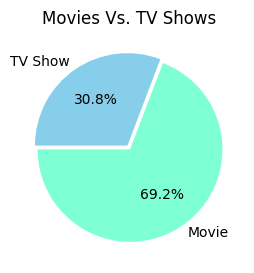

In [ ]:
# Netflix content by Type

plt.figure(figsize=(6,3))
plt.title("Movies Vs. TV Shows")
g=plt.pie(tdf2_exploded.type.value_counts(),explode=(0.025,0.025),
labels=tdf2_exploded.type.value_counts().index, colors=['aquamarine','skyblue'],autopct='%1.1f%%',
startangle=180)

plt.show()

# This pie chart shows that the contents type share for Movies is 2/3 rd (69.2 %) compared to TV Shows (30.8 %)

In [ ]:
# Getting the yearly count of movies and TV shows when Netflix added the data onto their platform

yearly_count = tdf2_exploded.groupby(tdf2_exploded['year_added']).aggregate({ 'year_added' : 'count' }).rename(columns={"index": "year","year_added":"count"}).reset_index()
yearly_count.sort_values(by= 'count', ascending = False)
yearly_count['year_added'] = yearly_count['year_added'].astype('int64')

yearly_count



KeyError: ignored

In [ ]:
# Figsize should be done first
plt.figure(figsize  = (12,2))

# call the plotting function
sns.barplot(data = yearly_count, x='year_added', y= 'count', palette = 'flare',width=1, edgecolor="white", linewidth=0.7)

# do the customizations
plt.xticks(rotation = 45, fontsize = 10)
plt.title('Yearly Count for Netflix Platform Release', color = 'orange', fontsize = 12 )

# show the plot
plt.show()

In [ ]:
# We can fetch the data for which year, how many movies were released

release_year_cnt = tdf2_exploded.release_year.value_counts().reset_index()
release_year_cnt = release_year_cnt.rename(columns={"index": "release_year","release_year":"count"}).sort_values('count', ascending= False)
release_year_cnt.set_index('release_year', inplace=True)
release_year_cnt.sort_values('count', ascending= False)



In [ ]:
release_year_cnt.reset_index()

In [ ]:
# Histogram Plot to check the yearly release of number of Movies/TV-Shows
plt.figure(figsize  = (12,8))
sns.histplot(tdf2_exploded, x= tdf2_exploded['release_year'], hue= tdf2_exploded['type'] , bins = 30, kde = True)

plt.xticks(fontsize = 10)
plt.title('Yearly Count for Movies/TV-Shows Released', color = 'orange', fontsize = 12 )

plt.show()

In [ ]:
# Boxplot for the count of released movies and TV-shows each year

plt.figure(figsize  = (12,2))
sns.boxplot(tdf2_exploded, x= tdf2_exploded['release_year'], y= tdf2_exploded['type'])

plt.xticks(fontsize = 10)
plt.title('Yearly Count for Movies/TV-Shows Released', color = 'orange', fontsize = 12 )

plt.show()

In [ ]:
# Duration Distribution for TV Shows

netflix_shows_tdf = tdf2_exploded[tdf2_exploded.type.str.contains("TV Shows")]
netflix_shows_tdf['duration'] = netflix_shows_tdf['duration'].str.extract('(\d+)',expand=False).astype(int)

In [ ]:
# Creating a boxplot for TVShows duration

plt.figure(figsize=(9, 3))
sns.boxplot(data=netflix_shows_df, y='type', x='duration')
plt.xlabel('TV-Shows')
plt.ylabel('Duration')
plt.title('Distribution of Duration for TV-Shows')
plt.show()

In [ ]:
tdf2_exploded.head()

In [ ]:
tdf2_exploded.listed_in.value_counts().head(10)

In [ ]:
x_listed_in = tdf2_exploded.listed_in.value_counts().head(10).index
x_listed_in

In [ ]:
y_listed_in = tdf2_exploded.listed_in.value_counts().head(10).values
y_listed_in

In [ ]:
# Conerting the dataframes types to categroy from objects

tdf2_exploded['cast'] = tdf2_exploded['cast'].astype('category')
tdf2_exploded['country'] = tdf2_exploded['country'].astype('category')
tdf2_exploded.info()

In [ ]:
# Top 10 countrieswith most produced Movies/TV-Shows
country_count = tdf2_exploded.country.value_counts().head(10)
country_count

In [ ]:
tdf2_exploded['cast'] = tdf2_exploded['cast'].astype('object')
tdf2_exploded['country'] = tdf2_exploded['country'].astype('object')
tdf2_exploded.info()

# 5. Missing Value & Outlier check

In [ ]:
# Here a boxplot previously created for the durations distribution of TV-shows. We can check for potential outliers for the same.

plt.figure(figsize=(9, 3))
sns.boxplot(data=netflix_shows_df, y='type', x='duration')
plt.xlabel('TV-Shows')
plt.ylabel('Duration')
plt.title('Distribution of Duration for TV-Shows')
plt.show()

Analyszing the above the boxplot, we can say that any TV-shows with more than 3 seasons in Duration should be an outliers. Their are TV-shows with more than 10 Seasons. This suggests that most TV-shows on Netflix are designed to fit within a standard Seasons ranging from 1 to 3.

In [ ]:
# Detecting missing values
# There are several ways to detect missing values in Python. isnull() function is widely used for the same purpose

tdf2_exploded.isnull().any()

In [ ]:
tdf2_exploded.T.apply(lambda x: x.isnull().sum(), axis = 1)

In [ ]:
tdf2_exploded.isnull().sum().sum()

In [ ]:
# After the identification of Missing Values we can replace these null values with appropriate content.

tdf2_exploded.director.fillna('Director not available', inplace = True)
tdf2_exploded.cast.fillna('Cast not available', inplace = True)
tdf2_exploded.country.fillna('Country not available', inplace = True)
tdf2_exploded.dropna(subset= ['date_added', 'rating'], inplace = True)
tdf2_exploded.dropna(subset= ['duration'], inplace = True)

In [ ]:
tdf2_exploded.head()

# 6. Insights based on Non-Graphical and Visual Analysis




1. Comments on the range of attributes:

The Netflix dataframe has originally 8807 records and these records has 12 columns giving the data like Show_id, Type, Title, Director, Cast, Country, Date_added, Release_year, Rating, Duration in Minutes or Seasons , Genre Listed_in, Description about the data.

This data is a 2 Dimentional data. Also, this has a 4307 Null/Missing values.

This data should be mainly divided into Movies and TV-Shows. This data set has 6126 Movies and 2664 TV Shows included in the DataFrame.



2. Comments on the distribution of the variables and relationship between them:  

This dataframe includes some columns which has multiple data points, such as Cast, Directors, Listed-in. We have un-nested all these data points. After un-nesting the record counts are increased to 64951.



3. Comments for each univariate and bivariate plot:

As the bar-plot indicates, the contents released on Netflix platform was started from 2015 and grown significantly till 2019 being the maximum released on Netflix. Then it has been a steady growth.
Also, we have checked the overall movies and TV shows released. In 2018, 7708 movies and TV shows were released and 2019-20 also had same range of releases.  A histogram for analysing check the yearly release of number of Movies/TV-Shows. In movies section, 2018 and 2019 shows an increasing count of releases. In TV shows, 2019-20 shows the maximum number of releases. A Boxplot for the count of released movies and TV-shows each year shows the data as mostly the maximum number of movie releases consider to be between 2010 to 2019. But when it comes to TV shows the maximum number of shows are released between 2017 to 2020.
The boxplot showing distribution of duration for TV shows. Mostly the TV shows are having 1 to 3 seasons. There are TV shows who has more 3 seasons but has not much count. These should be considered as outliers for the same.




# 7. Business Insights

1. This above analysis has revealed that Netflix added more number of movies than that of TV shows, the platform shows more interest towards movies than in TV-shows
2.	Netflix platform has the following top 10 casts who has appeared in most number of Movies/TV-shows. Netflix has content for 39296 actors.
3.	Netflix platform has the following top 10 directors who has directed most number of Movies/TV-shows. These top 10 directors are as below.
4.	As we have compared all the Netflix content by Type, i.e., Movies and TV-Shows. A pie chart indicating that the contents type share for Movies is 2/3rd (69.2 %) compared to TV Shows (30.8 %).
5.	As the bar-plot indicates, the contents released on Netflix platform was started from 2015 and grown significantly till 2019 being the maximum released on Netflix. Then it has been a steady growth.
6.	Also, we have checked the overall movies and TV shows released. In 2018, 7708 movies and TV shows were released and 2019-20 also had same range of releases.
7.	A histogram for analysing check the yearly release of number of Movies/TV-Shows. In movies section, 2018 and 2019 shows an increasing count of releases. In TV shows, 2019-20 shows the maximum number of releases.
8.	A Boxplot for the count of released movies and TV-shows each year shows the data as mostly the maximum number of movie releases consider to be between 2010 to 2019. But when it comes to TV shows the maximum number of shows are released between 2017 to 2020.
9.	The boxplot showing distribution of duration for TV shows. Mostly the TV shows are having 1 to 3 seasons. There are TV shows who has more 3 seasons but has not much count. These should be considered as outliers for the same.
10.	Top 10 countries with most produced Movies/TV-Shows. The list has United States with most number of produced content (19929), followed by India, Japan and United Kingdom.


# 8 Recommendations

1.	As the most of the movies/TV-shows released on Netflix is in a year 2019 so company need to keep the releases up so that more consumers will be attracted to buy subscription.
2.	As the most number of movies are directed in US. The following countries like India and Japan are also a huge market to grow subscription in these countries. These e countries marketing strategy should be boosted for more growth in consumers.
3.	Also, it should be noted that TV shows with 1 to 3 seasons tend to be more popular amongst the consumers. Netflix should promote more of those TV shows with 1 to 3 seasons.
4.	Netflix should focus on the movies with cast who has most number of followers. Also, actors such as following has most number of movies/TV-shows. Should be useful to target the countries with these actors to gain more consumers.  


In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Cast not available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country not available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not available,Cast not available,Country not available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# New Solution - from Vishal


In [ ]:
path = '/content/drive/MyDrive/Dataset/netflix.csv'

tempdata = pd.read_csv(path)
tempdata.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
tempdata.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
tempdata.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64